Döngü 0 Loss=913.4932
Döngü 100 Loss=139.7113
Döngü 200 Loss=93.73709
Döngü 300 Loss=91.067314
Döngü 400 Loss=89.89759
Döngü 500 Loss=89.86217
Döngü 600 Loss=89.82205
Döngü 700 Loss=89.777275
Döngü 800 Loss=89.726776
Döngü 900 Loss=89.67219
Döngü 1000 Loss=89.61128
Döngü 1100 Loss=89.5453
Döngü 1200 Loss=89.47411
Döngü 1300 Loss=89.39718
Döngü 1400 Loss=89.313034
Döngü 1500 Loss=89.224815
Döngü 1600 Loss=89.14862
Döngü 1700 Loss=89.06978
Döngü 1800 Loss=88.98482
Döngü 1900 Loss=88.8961
Döngü 2000 Loss=88.80197
Döngü 2100 Loss=88.70359
Döngü 2200 Loss=88.59828
Döngü 2300 Loss=88.487114
Döngü 2400 Loss=88.36912
Döngü 2500 Loss=88.24898
Döngü 2600 Loss=88.11761
Döngü 2700 Loss=87.981445
Döngü 2800 Loss=87.836876
Döngü 2900 Loss=87.68933
Döngü 3000 Loss=87.54248
Döngü 3100 Loss=87.39974
Döngü 3200 Loss=87.24904
Döngü 3300 Loss=87.08901
Döngü 3400 Loss=86.921814
Döngü 3500 Loss=86.74138
Döngü 3600 Loss=86.553085
Döngü 3700 Loss=86.34951
Döngü 3800 Loss=86.136734
Döngü 3900 Loss=85.90889
Dön

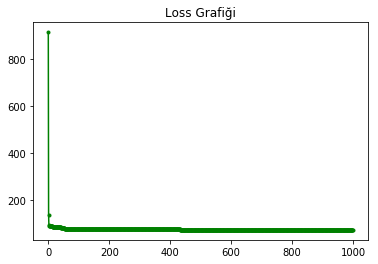

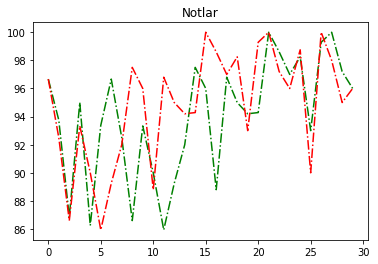

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
grafik=[]
#din,fen,mat,sosyal,Türkçe,İngilizce                                                                       #din,fen,mat,sosyal,Türkçe,İngilizce
x=np.array([96.6677,93.75,86.875,95.,86.25,93.3750,96.6667,92.50,86.60,93.3333,90.,85.9375,89.25,92.,97.5,96.,88.8,96.8,95.,94.2,94.2857,100.,98.6,97.,98.25,93,99.2857,100.,97.2,96.])#kaynak not
s_k=np.array([5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,6.,6.,6.,6.,6.,6.,6.,6.,6.,6.,6.,6.,7.,7.,7.,7.,7.,7.])#sınıf kaynak
d_k=np.array([1.,1.,1.,1.,1.,1.,2.,2.,2.,2.,2.,2.,1.,1.,1.,1.,1.,1.,2.,2.,2.,2.,2.,2.,1.,1.,1.,1.,1.,1.])#dönem kaynak
s_h=np.array([5.,5.,5.,5.,5.,5.,6.,6.,6.,6.,6.,6.,6.,6.,6.,6.,6.,6.,7.,7.,7.,7.,7.,7.,7.,7.,7.,7.,7.,7.])#sınıf hedef
d_h=np.array([2.,2.,2.,2.,2.,2.,1.,1.,1.,1.,1.,1.,2.,2.,2.,2.,2.,2.,1.,1.,1.,1.,1.,1.,2.,2.,2.,2.,2.,2.])#dönem hedef
y=np.array([96.6667,92.50,86.60,93.3333,90.,85.9375,89.25,92.,97.5,96.,88.8,96.8,95.,94.2,94.2857,100.,98.6,97.,98.25,93,99.2857,100.,97.2,96.,98.75,90.,100,98.,95.,96.])#hedef not

dataset=np.array([x,s_k,d_k,s_h,d_h,y])
del x,s_k,d_k,s_h,d_h,y
X0=tf.placeholder("float")
X1=tf.placeholder("float")
X2=tf.placeholder("float")
X3=tf.placeholder("float")
X4=tf.placeholder("float")
Y=tf.placeholder("float")

#define parameters

W0_0=tf.Variable(0.,name="W0_0")
W0_1=tf.Variable(0.,name="W0_1")
W0_2=tf.Variable(0.,name="W0_2")
W0_3=tf.Variable(0.,name="W0_3")
W0_4=tf.Variable(0.,name="W0_4")
b=tf.Variable(np.random.rand(),name="b")

toplam=tf.multiply(W0_0,X0)+tf.multiply(W0_1,X1)+tf.multiply(W0_2,X2)+tf.multiply(W0_3,X3)+tf.multiply(W0_4,X4)+b
y_tahmin=tf.nn.sigmoid(toplam)*100.

loss=tf.reduce_sum(tf.abs(Y-y_tahmin))#L1
optimizer=tf.train.AdamOptimizer(2e-4).minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(100000):
    sess.run(optimizer,feed_dict={X0:dataset[0],X1:dataset[1],X2:dataset[2],X3:dataset[3],X4:dataset[4],Y:dataset[5]})
    if i%100==0:
      l_=sess.run(loss,feed_dict={X0:dataset[0],X1:dataset[1],X2:dataset[2],X3:dataset[3],X4:dataset[4],Y:dataset[5]})
      grafik.append(l_)
      print("Döngü",i,"Loss="+str(l_))
  print(sess.run(y_tahmin,feed_dict={X0:96.,X1:7.,X2:2.,X3:8.,X4:1.}))
  sess.close()

plt.title("Loss Grafiği")
plt.plot(grafik,"-g.")
plt.show()

plt.title("Notlar")
plt.plot(dataset[0],"-.g")
plt.plot(dataset[5],"-.r")

plt.show()